# $t$-test

<!--
https://genomicsclass.github.io/book/pages/clt_and_t-distribution.html
-->

Un $t$-test è un test di verifica delle ipotesi nel quale la **statistica test** ha una distribuzione **$\mathbf{t}$ di Student** sotto l'ipotesi nulla $\text{H}_0$,

$$p(x|\text{H}_0) \sim t_{\nu}$$

## $t$-test per un campione
Il $t$-test per un campione è un test di verifica del valore di un parametro, per la media di una variabile casuale sotto un'opportuna ipotesi nulla $\text{H}_0$. Il parametro $t$,

$$t = \frac{\hat{x} - \mu_0}{\frac{\hat{s}}{\sqrt{n}}} \ ,$$

confronta la distanza della media $\bar{x}$ del campione dal valore medio $\mu_0$ della distribuzione $p(x|\text{H}_0)$, con la deviazione standard del campione $s$ opportunamente scalata della grandezza del campione $n$. 

Se le osservazioni della variabile casuale sono indipdendenti tra di loro, allora $t$ è una variabile casuale che tende a una variabile normale $\mathscr{N}(0,1)$ per il teorema del limite centrale **todo** *link a una sezione sul campionamento*


Sample statistics:
 sample avg    : 88.6
 sample std.dev: 2.8809720581775866

1-sample t-test
 t-Statistic: 2.017991366836461
 p-Value    : 0.11375780482862627

> Fail to reject the null hypothesis, H0: no significant difference in means between the classes.


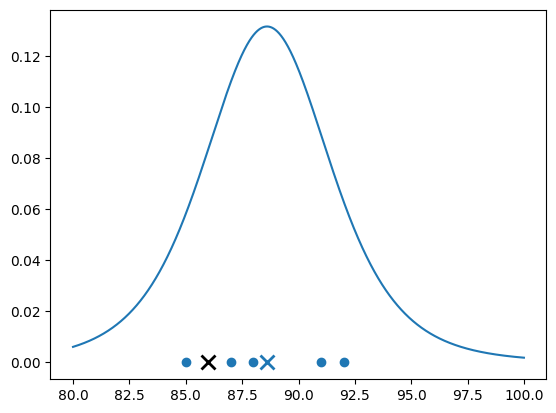

In [1]:
# Example

import numpy as np
from scipy.stats import ttest_1samp, t

import matplotlib.pyplot as plt

# Test statistics has expected value mu0 under H0 hypotesis
mu0 = 86.          # Expeceted value of the test statistics under H0
sigma = 0.05       # Significance level


# Sample data: test scores from two classes
sample = [88, 92, 85, 91, 87]
n_s = len(sample)
mu_s = np.sum(sample)/n_s
s_s = ( np.sum((sample-mu_s)**2)/(n_s-1) )**.5

print("Sample statistics:")
print(f" sample avg    : {mu_s}")
print(f" sample std.dev: {s_s}")


# Perform independent t-test
t_statistic, p_value = ttest_1samp(sample, mu0)

print(f"\n1-sample t-test")
print(f" t-Statistic: {t_statistic}")
print(f" p-Value    : {p_value}")


# Interpretation
if p_value < sigma:
    print("\n> Reject the null hypothesis, H0: the means of the two classes are significantly different.")
else:
    print("\n> Fail to reject the null hypothesis, H0: no significant difference in means between the classes.")

x_plot = np.arange(80, 100, .01)
t_pdf_plot = t.pdf(x_plot, n_s, mu_s, s_s)

plt.figure()
plt.plot(x_plot, t_pdf_plot, color=plt.cm.tab10(0))
plt.plot(sample, np.zeros(n_s), 'o', color=plt.cm.tab10(0))
plt.plot(mu_s, 0., 'x', color=plt.cm.tab10(0), markersize=10, markeredgewidth=2)
plt.plot(mu0 , 0., 'x', color='black'        , markersize=10, markeredgewidth=2)



## $t$-test per due campioni

- test con varianza uguale (o simile), *t*-test/test con varianza diversa, *Welch*
- campioni indipendenti/campioni dipendenti (paired samples)

### $t$-test per due variabili indipendenti, con varianza simile e stesso numero di osservazioni

Nell'ipotesi che i campioni siano ottenuti da due variabili indipendenti, i risultati ottenuti nella sezione sulla [combinazione di variabili casuali]()
- il **valore atteso** della somma/differenza di variabili casuali indipendenti è uguale alla somma/differenza dei valori attesi delle singole variabili
- la **varianza** della somma/differenza di variabili casuali indipendenti è uguale alla somma delle varianze delle singole variabili.

Il $t$-test per due campioni equivale al $t$-test per un campione uguale alla differenza delle osservazioni nei due campioni,

$$z_i = x_i - y_i \ .$$

Sample statistics:
Sample A
 sample avg    : 88.6
 sample std.dev: 2.8809720581775866
Sample B
 sample avg    : 81.0
 sample std.dev: 2.9154759474226504

s-sample t-test
 t-Statistic: 4.146139914483853
 p-Value    : 0.0032260379191180397
4.146139914483853

Reject the null hypothesis: The means of the two classes are significantly different.


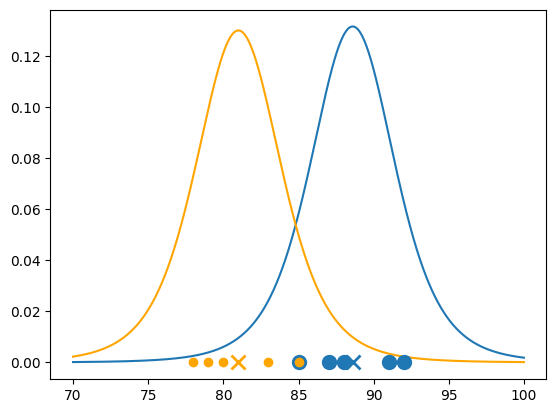

In [2]:
# Example

import numpy as np
from scipy.stats import ttest_ind

# Significance level
sigma = 0.05

# Sample data: test scores from two classes
class_A = [88, 92, 85, 91, 87]
class_B = [78, 85, 80, 83, 79]

nA = len(class_A); mu_A = np.sum(class_A)/nA; sA = ( np.sum((class_A-mu_A)**2)/(nA-1) )**.5
nB = len(class_B); mu_B = np.sum(class_B)/nB; sB = ( np.sum((class_B-mu_B)**2)/(nB-1) )**.5

print("Sample statistics:")
print("Sample A")
print(f" sample avg    : {mu_A}")
print(f" sample std.dev: {sA}")
print("Sample B")
print(f" sample avg    : {mu_B}")
print(f" sample std.dev: {sB}")


# Perform independent t-test
t_statistic, p_value = ttest_ind(class_A, class_B)


print(f"\ns-sample t-test")
print(f" t-Statistic: {t_statistic}")
print(f" p-Value    : {p_value}")

print((mu_A-mu_B)/((sA**2 + sB**2)/nA)**.5)

# Interpretation
if p_value < sigma:
    print("\nReject the null hypothesis: The means of the two classes are significantly different.")
else:
    print("\nFail to reject the null hypothesis: No significant difference in means between the classes.")

x_plot = np.arange(70, 100, .01)
t_pdf_A = t.pdf(x_plot, nA, mu_A, sA)
t_pdf_B = t.pdf(x_plot, nB, mu_B, sB)

plt.figure()
plt.plot(x_plot, t_pdf_A, color=plt.cm.tab10(0))
plt.plot(x_plot, t_pdf_B, color='orange')
plt.plot(class_A, np.zeros(nA), 'o', color=plt.cm.tab10(0), markersize=10)
plt.plot(class_B, np.zeros(nB), 'o', color='orange'       )
plt.plot(mu_A, 0., 'x', color=plt.cm.tab10(0), markersize=10, markeredgewidth=2)
plt.plot(mu_B, 0., 'x', color='orange'       , markersize=10, markeredgewidth=2)


In [3]:
# 